In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Variance - describes how much values are spread
# Covatiance - measures dependency between 2 variables
# # Positive Cov - value of 1st variable are large ---> value of 2nd variable are large
# # Negative Cov - value of 1st variable are large ---> value of 2nd variable are small

Covariance calculation of matrix X

V(X) = 1/n Sum[n,i = 1](xi - mean(x))^2

n = length of the vector

i.e. variance of first column vector of X is:

X = [1, 3, 5]
    [5, 4, 1]
    [3, 8, 6]


V(X:,1) = ((1 - 3)^2 + (5 - 3)^2) / 3 = 2.67

This is the first vell of the covariance matrix

The next variance of the second column vector of X will correspond to the next value in covariance matrix on the diagonal

In [ ]:
# Cells in the covariance matrix other than the ones on the diagonal come from covariance between 2 column vectors from the original matrix

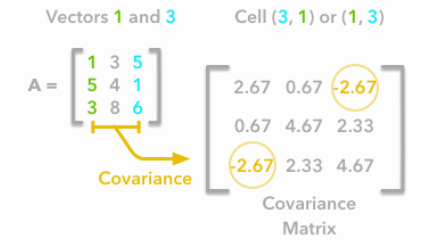

Formula for covariance between 2 variables:

cov(X, Y) = 1/n Sum[n, i = 1](xi - mean(x))(yi - mean(y))

In [11]:
# Code example:

A = np.array([
    [1, 3, 5],
    [5, 4, 1],
    [3, 8, 6]
])

# we want to calc covariance of 1st and 3rd columns of A

x = A[:,0]
y = A[:,2]

sum = 0
for i in range(len(x)):
    sum += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
res = (1/len(x)) * sum 

In [15]:
# alternatively we can use numpy's covariance function
# rowvar = False specifies that columns are treated as the vectors
res = np.cov(A, rowvar=False, bias=True)

In [16]:
# alternatively can calculate using dot product
# can center A around 0 - subtract mean of each vector to each element of the vector to have a vector of mean equal to 0
# then multiply the vector with own transpose and divide by number of observations

In [31]:
# axis = 0 means we look at columns
def calc_cov(X):
    mean_X = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - mean_X
    cov = X.T.dot(X)/lenX
    return cov

In [32]:
calc_cov(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

The formula for above is as follows:

XTY = 1/n * Sum[n, i = 1](xi)(yi)

very similar to 

cov(X, Y) = 1/n * Sum[n, i = 1](xi - mean(x))(yi - mean(y))

The difference is that in the dot-product version, we center data around the mean before doing dot-product

So no need for the difference of mean

In [35]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)

    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)

    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

Covariance matrix:
 [[ 2.66666667  0.66666667 -2.66666667]
 [ 0.66666667  4.66666667  2.33333333]
 [-2.66666667  2.33333333  4.66666667]]


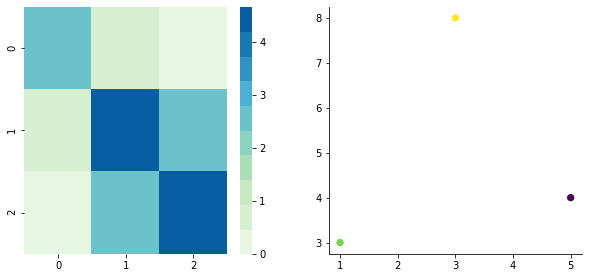

In [36]:
plotDataAndCov(A)

/home/damian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/damian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


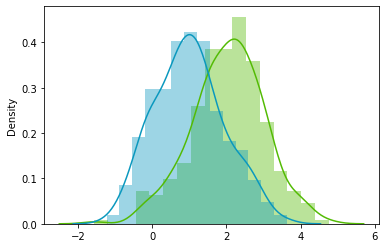

In [48]:
# generating random data for visualisation.

# looking at normal distribution

np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T

sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

# 

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


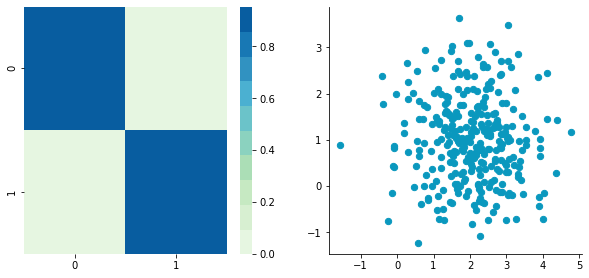

In [49]:
# Equivalent stddev but different means

plotDataAndCov(A)


In [50]:
# can observe that 2 dimensions are uncorrelated
# variance of each variable is large ~1 as per cov matrix and the covariance of columns 1 and 2 is very small ~0

In [51]:
# Now lets generate correlated data

np.random.seed(1234)
b1 = np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300) / 2

/home/damian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/damian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


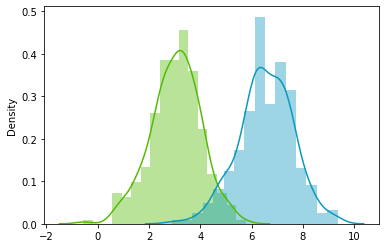

In [52]:
sns.distplot(b1.T, color="#53BB04")
sns.distplot(b2.T, color="#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


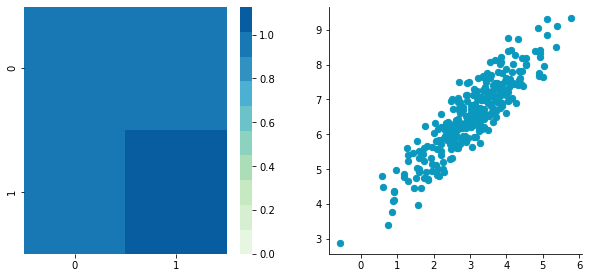

In [57]:
B = np.array([b1, b2]).T
plotDataAndCov(B)

In [58]:
# correlation is visible on scatterplot and cov matrix
# here, y could be derived from x and vice versa

In [60]:
# Preprocessing - Mean normalization
# # a.k.a. removing mean from each observation
# X' = X - mean(X)

def center_around_mean(X):
    nx = X - np.mean(X, axis=0)
    return nx

print(center_around_mean(B))

[[ 4.26183433e-01  6.86045521e-01]
 [-1.23622743e+00 -8.84332363e-01]
 [ 1.38745524e+00  1.27502136e+00]
 [-3.57903627e-01  9.57330841e-01]
 [-7.65840464e-01 -1.64057042e+00]
 [ 8.41911210e-01  7.91032668e-01]
 [ 8.14336683e-01  1.52626742e+00]
 [-6.81775235e-01 -3.89057150e-01]
 [-2.95553586e-02  5.19319513e-02]
 [-2.28793668e+00 -3.16745080e+00]
 [ 1.10478399e+00  1.24541352e+00]
 [ 9.46694292e-01  6.71743395e-01]
 [ 9.08072397e-01  9.90212451e-01]
 [-2.06650655e+00 -1.57875877e+00]
 [-3.79329096e-01 -3.95664685e-01]
 [-4.31333660e-02 -1.90570728e-01]
 [ 3.60201681e-01  8.18761977e-01]
 [ 2.43840210e-01  2.09555923e-01]
 [ 1.27590646e+00  9.06728652e-01]
 [-1.59215728e+00 -2.10720527e+00]
 [-2.47898055e-01  2.46437292e-01]
 [-7.01221075e-01 -2.27103246e-01]
 [ 1.48169646e-01  5.01428894e-01]
 [ 5.08187180e-01  5.71211524e-01]
 [ 1.27289982e+00  8.65719531e-01]
 [-5.14557015e-01 -6.89223544e-01]
 [ 6.30302354e-01  1.58103105e+00]
 [-1.86227896e+00 -1.78797846e+00]
 [-2.28360271e-01  1

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


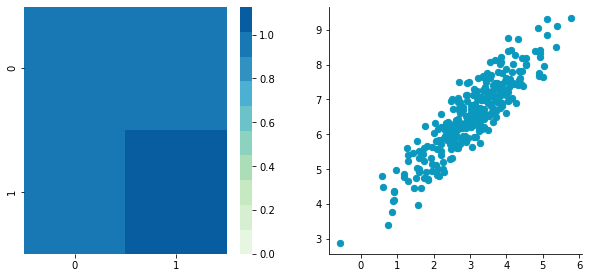

In [63]:
BCentered = center_around_mean(B)
plotDataAndCov(B)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


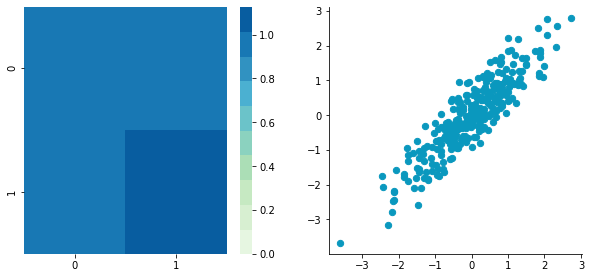

In [64]:
plotDataAndCov(BCentered)
plt.show()
plt.close()

In [65]:
# now the data is centered around mean

In [67]:
# Standardization:

# putting all features on the same scale
# divide each 0-centered dimension by its stddev

# X' = (X - mean(X))/ delta(X)
# delta(X) --> stddev of X

def standardize(X):
    nx = center_around_mean(X) / np.std(X, axis=0)
    return nx

In [68]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


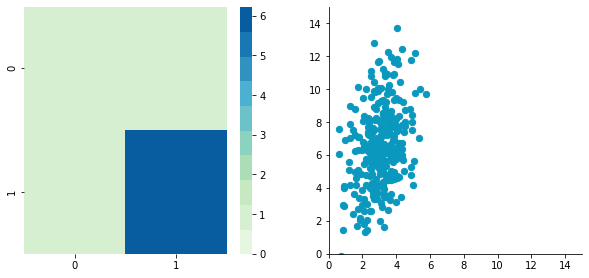

In [69]:
plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


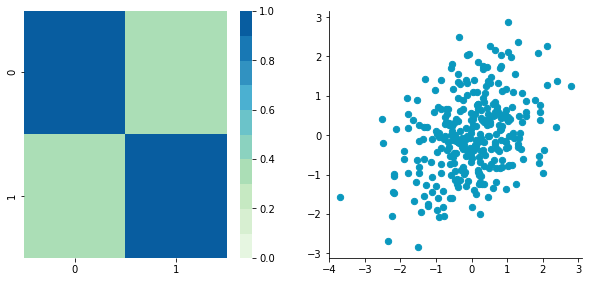

In [70]:
CStandardized = standardize(C)
plotDataAndCov(CStandardized)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


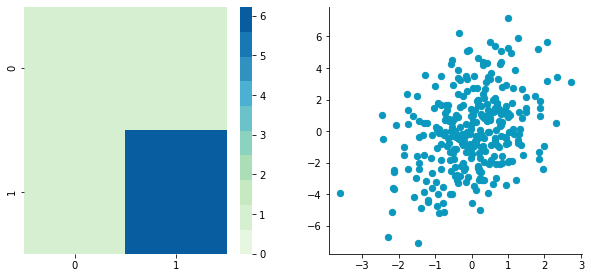

In [73]:
# Whitening:

# a.k.a. sphering the data --> want to transform the data in a way that the covariance matrix is the identity matrix
# 1 in diagonal and 0 for others
# Steps:
# # 0-center the data
# # decorrelate the data
# # rescale the data

C_centered = center_around_mean(C)
plotDataAndCov(C_centered)
plt.show()
plt.close()

Covariance matrix:
 [[8.21222171e-01 8.88178420e-17]
 [8.88178420e-17 6.35579346e+00]]


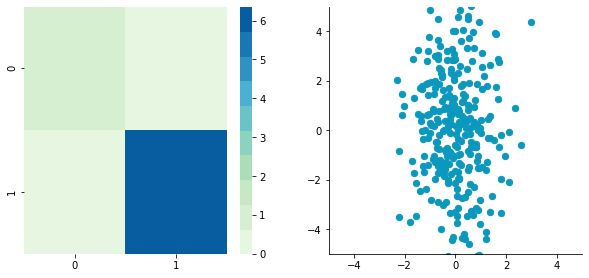

In [76]:
# Decorrelating --> a.k.a. rotating data until there is no more correlation

# but how to find the right rotation?
# eigenvectors of the covariance matrix help us:
# # they indicate the direction where the spread of the data is at its maximum

def decorrelate(X):
    nx = center_around_mean(X)
    cov = X.T.dot(X)/float(X.shape[0])
    e_vals, e_vecs = np.linalg.eig(cov)
    decor = X.dot(e_vecs)
    return decor

CDecorrelated = decorrelate(C_centered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [77]:
# Rescaling data:

def whiten(X):
    nx = center_around_mean(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
#     1e-5 added to avoid division by 0
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance matrix:
 [[9.99987823e-01 1.62832710e-17]
 [1.62832710e-17 9.99998427e-01]]


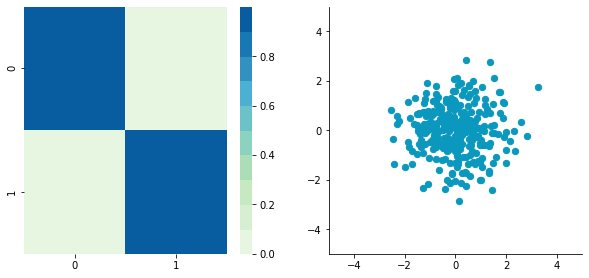

In [78]:
CWhitened = whiten(C_centered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [79]:
# image whitening

In [86]:
# Zero Component Analysis (ZCA)
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# CIFAR-10 dataset: X_train contains 50000 images
# shape is (50000, 32, 32, 3) where 32,32 are the x,y dimensions and 3 is the number of color channels

# lets pick a subset of images:

X = X_train[:1000]

# now lets reshape so we have 1 image per row
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
X.shape

(1000, 3072)

In [87]:
def show_image(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32, 32, 3))
    plt.show()
    plt.close()

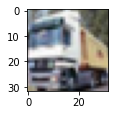

In [92]:
show_image(X[1, :])

In [93]:
# whitening the data:

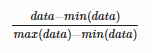

In [94]:
# here, min value is 0 and max value is 255
# so we have data/255

X_norm = X / 255

# min is now 0 and max is now 1


In [98]:
# Next step: subtract mean from the image

# calculate mean across all pixel values across all 1000 imaeges
X_norm.mean(axis=0).shape

X_norm = X_norm - X_norm.mean(axis=0)

array([ 5.44009282e-18,  4.32986980e-18,  7.49400542e-18, ...,
        2.84668122e-18, -4.08006962e-18,  8.34055047e-18])

In [99]:
# now lets calculate covariance matrix
# in our case, each row of the matrix X is an image, so rows correspond to observations and columns correspond to features (3072) - pixel values
# we want to calculate correlation between pixels because the goal of whitening is to remove these correlations to force classifiers to focus on higher-order relations

cov = np.cov(X_norm, rowvar=False)

In [101]:
# now we want to rotate the dataset
# first calculate SVD

U,S,V = np.linalg.svd(cov)

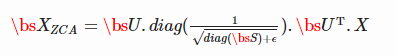

In [102]:
# equation for ZCA whitening
# U - left singular vectors, S singular values of covariance of initial normalized dataset of images
# X - normalized dataset
# e - epsilon (hyper-parameter) whiteneing coefficient
# diag(a) - matrix with the vector a as a diagonal and 0 in other cells

In [119]:
# Implementation:
epsilon = 0.1
X_ZCA = (U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T)).T
X_ZCA.shape

(1000, 3072)

In [120]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


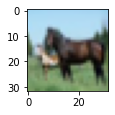

In [121]:
show_image(X[12, :])

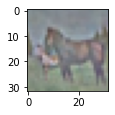

In [122]:
show_image(X_ZCA_rescaled[12, :])